In [ ]:
!pip install pyomo

In [ ]:
!apt-get install -y -qq glpk-utils coinor-cbc

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../00-libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../01-libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../02-libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../03-libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../04-glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Selecting previously unselected package c

In [ ]:
from pyomo.environ import *

# Criar modelo
model = ConcreteModel()

# Conjunto de experimentos
experimentos = ['RNAseq', 'PCR', 'ChIPseq']
model.I = Set(initialize=experimentos)

# Parâmetros
p = {'RNAseq': 8, 'PCR': 4, 'ChIPseq': 10}
t = {'RNAseq': 4, 'PCR': 2, 'ChIPseq': 6}
r = {'RNAseq': 10, 'PCR': 5, 'ChIPseq': 12}
h = {'RNAseq': 3, 'PCR': 2, 'ChIPseq': 5}

T = 100  # tempo total
R = 200  # reagentes totais
H = 120  # horas de técnico totais

# Variáveis de decisão
model.x = Var(model.I, domain=NonNegativeIntegers)

# Função objetivo
def obj_expression(model):
    return sum(p[i] * model.x[i] for i in model.I)
model.obj = Objective(rule=obj_expression, sense=maximize)

# Restrições
model.restr_tempo = Constraint(expr=sum(t[i] * model.x[i] for i in model.I) <= T)
model.restr_reagentes = Constraint(expr=sum(r[i] * model.x[i] for i in model.I) <= R)
model.restr_horas = Constraint(expr=sum(h[i] * model.x[i] for i in model.I) <= H)

# Resolver
solver = SolverFactory('glpk')  # ou 'cbc' se instalado
solver.solve(model)

# Exibir resultados
for i in model.I:
    print(f"{i}: {model.x[i].value}")
print(f"Valor objetivo: {model.obj()}")

RNAseq: 0.0
PCR: 4.0
ChIPseq: 15.0
Valor objetivo: 166.0


# Task
Realize a análise de sensibilidade para o esquema de otimização, variando os parâmetros T, R e H e analisando o impacto nas variáveis de decisão e no valor objetivo.

## Refatorar o código de otimização

### Subtask:
Encapsular a lógica de criação e resolução do modelo Pyomo em uma função, para facilitar a execução repetida com diferentes parâmetros.


**Reasoning**:
Encapsulate the Pyomo model creation and solving logic into a function as requested in the instructions. This function will accept T, R, and H as arguments and return the results.



In [ ]:
from pyomo.environ import *

def solve_optimization_model(T, R, H):
    """
    Creates and solves the Pyomo optimization model with given parameters.

    Args:
        T: Total available time.
        R: Total available reagents.
        H: Total available technician hours.

    Returns:
        A dictionary containing the optimized values of the decision variables
        and the objective function value.
    """
    # Criar modelo
    model = ConcreteModel()

    # Conjunto de experimentos
    experimentos = ['RNAseq', 'PCR', 'ChIPseq']
    model.I = Set(initialize=experimentos)

    # Parâmetros
    p = {'RNAseq': 8, 'PCR': 4, 'ChIPseq': 10}
    t = {'RNAseq': 4, 'PCR': 2, 'ChIPseq': 6}
    r = {'RNAseq': 10, 'PCR': 5, 'ChIPseq': 12}
    h = {'RNAseq': 3, 'PCR': 2, 'ChIPseq': 5}

    # Variáveis de decisão
    model.x = Var(model.I, domain=NonNegativeIntegers)

    # Função objetivo
    def obj_expression(model):
        return sum(p[i] * model.x[i] for i in model.I)
    model.obj = Objective(rule=obj_expression, sense=maximize)

    # Restrições
    model.restr_tempo = Constraint(expr=sum(t[i] * model.x[i] for i in model.I) <= T)
    model.restr_reagentes = Constraint(expr=sum(r[i] * model.x[i] for i in model.I) <= R)
    model.restr_horas = Constraint(expr=sum(h[i] * model.x[i] for i in model.I) <= H)

    # Resolver
    solver = SolverFactory('glpk')  # ou 'cbc' se instalado
    solver.solve(model)

    # Prepare results
    results = {}
    for i in model.I:
        results[i] = model.x[i].value
    results['objective_value'] = model.obj()

    return results

# Example usage (optional, just to test the function)
# initial_T = 100
# initial_R = 200
# initial_H = 120
# initial_results = solve_optimization_model(initial_T, initial_R, initial_H)
# print("Results with initial parameters:")
# print(initial_results)

## Definir os ranges dos parâmetros para análise de sensibilidade

### Subtask:
Escolher os parâmetros (T, R, H) e definir uma faixa de valores para cada um deles que serão usados na análise.


**Reasoning**:
Define the initial values and the ranges for T, R, and H as requested in the instructions.



In [ ]:
# Define the initial values for T, R, and H based on the previous successful execution
initial_T = 100
initial_R = 200
initial_H = 120

# Choose a range of values to explore for each parameter
T_values = [initial_T * 0.8, initial_T * 0.9, initial_T, initial_T * 1.1, initial_T * 1.2]
R_values = [initial_R * 0.8, initial_R * 0.9, initial_R, initial_R * 1.1, initial_R * 1.2]
H_values = [initial_H * 0.8, initial_H * 0.9, initial_H, initial_H * 1.1, initial_H * 1.2]

# Ensure the values are integers since the original constraints used <=
T_values = [int(v) for v in T_values]
R_values = [int(v) for v in R_values]
H_values = [int(v) for v in H_values]

print(f"T values to explore: {T_values}")
print(f"R values to explore: {R_values}")
print(f"H values to explore: {H_values}")

T values to explore: [80, 90, 100, 110, 120]
R values to explore: [160, 180, 200, 220, 240]
H values to explore: [96, 108, 120, 132, 144]


## Executar a análise de sensibilidade

### Subtask:
Iterar sobre os ranges definidos, modificando o valor de um parâmetro por vez na função de otimização e armazenando os resultados (valores das variáveis de decisão e valor objetivo) para cada execução.


**Reasoning**:
Initialize a list to store the sensitivity analysis results and iterate through the defined ranges of T, R, and H, calling the optimization function for each value while keeping other parameters constant. Store the results in the list.



In [ ]:
sensitivity_results = []

# Iterate over T values
for t_val in T_values:
    results = solve_optimization_model(t_val, initial_R, initial_H)
    sensitivity_results.append({
        'parameter_varied': 'T',
        'parameter_value': t_val,
        'results': results
    })

# Iterate over R values
for r_val in R_values:
    results = solve_optimization_model(initial_T, r_val, initial_H)
    sensitivity_results.append({
        'parameter_varied': 'R',
        'parameter_value': r_val,
        'results': results
    })

# Iterate over H values
for h_val in H_values:
    results = solve_optimization_model(initial_T, initial_R, h_val)
    sensitivity_results.append({
        'parameter_varied': 'H',
        'parameter_value': h_val,
        'results': results
    })

# Optional: print the collected results to verify
# import json
# print(json.dumps(sensitivity_results, indent=4))

## Analisar e visualizar os resultados

### Subtask:
Processar os resultados coletados para entender como as mudanças em cada parâmetro afetam a solução ótima e criar visualizações (gráficos) para apresentar essa relação.


**Reasoning**:
Import necessary libraries, convert the results to a DataFrame, and separate it for analysis.



DataFrame for T varied:
  parameter_varied  parameter_value  RNAseq   PCR  ChIPseq  objective_value
0                T               80    20.0   0.0      0.0            160.0
1                T               90     0.0  23.0      7.0            162.0
2                T              100     0.0   4.0     15.0            166.0
3                T              110     0.0   4.0     15.0            166.0
4                T              120     0.0   4.0     15.0            166.0

DataFrame for R varied:
  parameter_varied  parameter_value  RNAseq   PCR  ChIPseq  objective_value
5                R              160     0.0   3.0     12.0            132.0
6                R              180     0.0   0.0     15.0            150.0
7                R              200     0.0   4.0     15.0            166.0
8                R              220    10.0   0.0     10.0            180.0
9                R              240     0.0  43.0      2.0            192.0

DataFrame for H varied:
   parameter_v

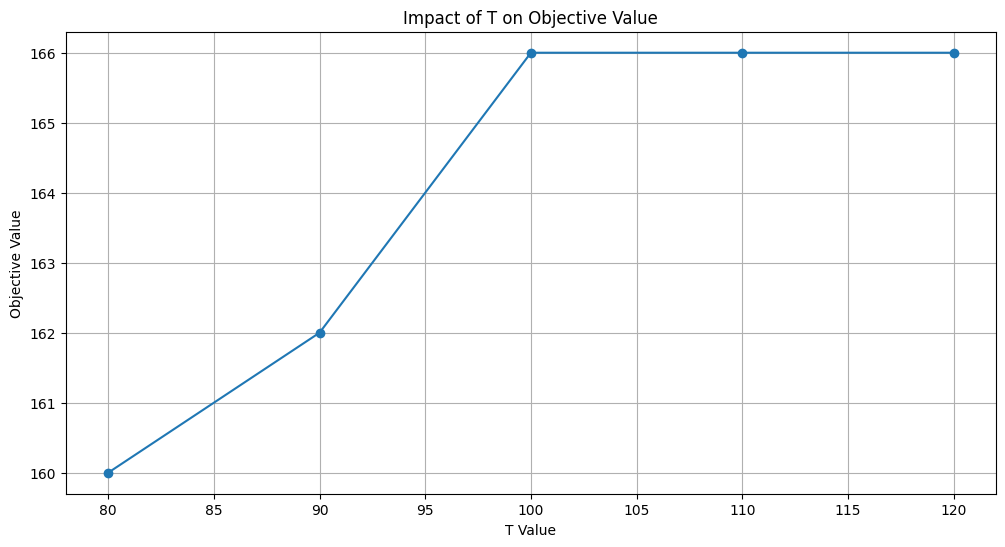

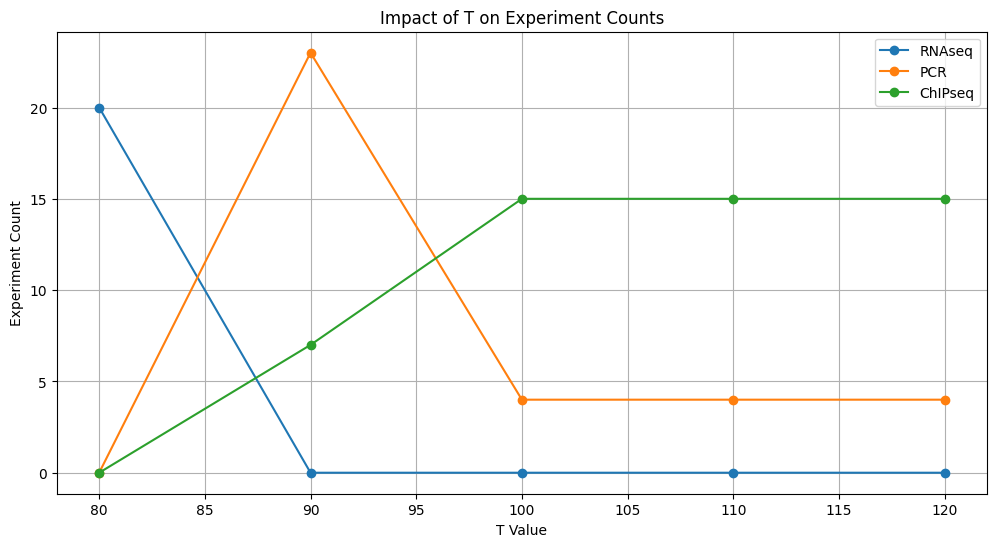

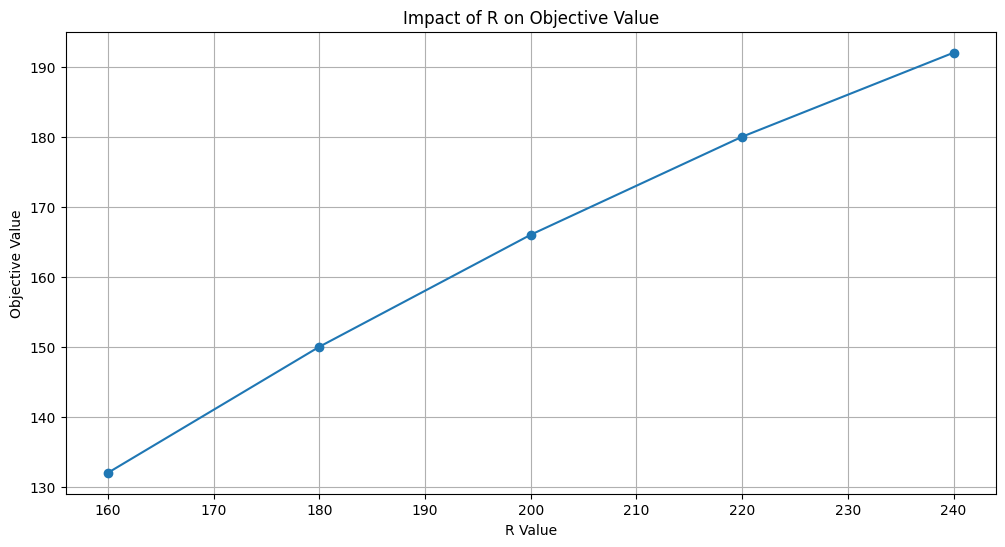

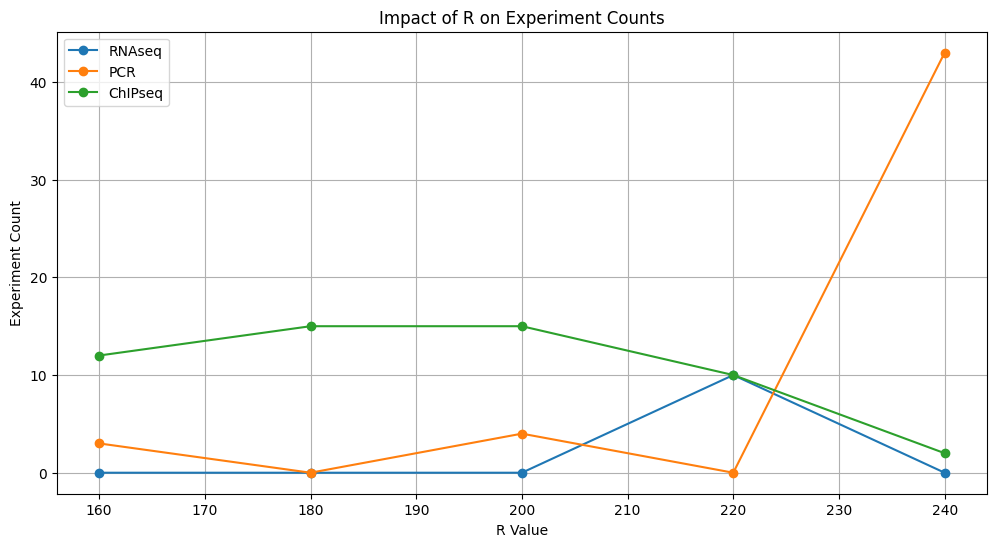

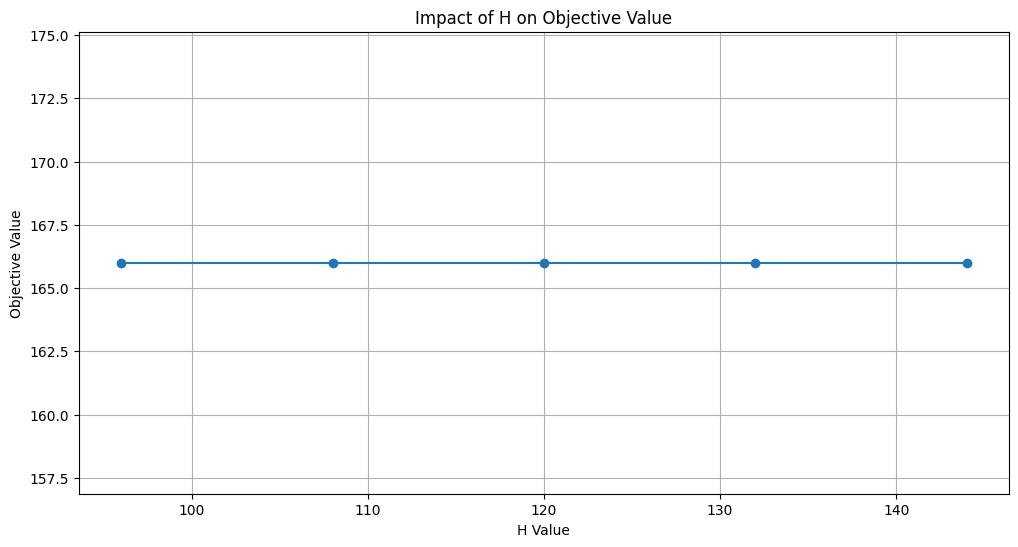

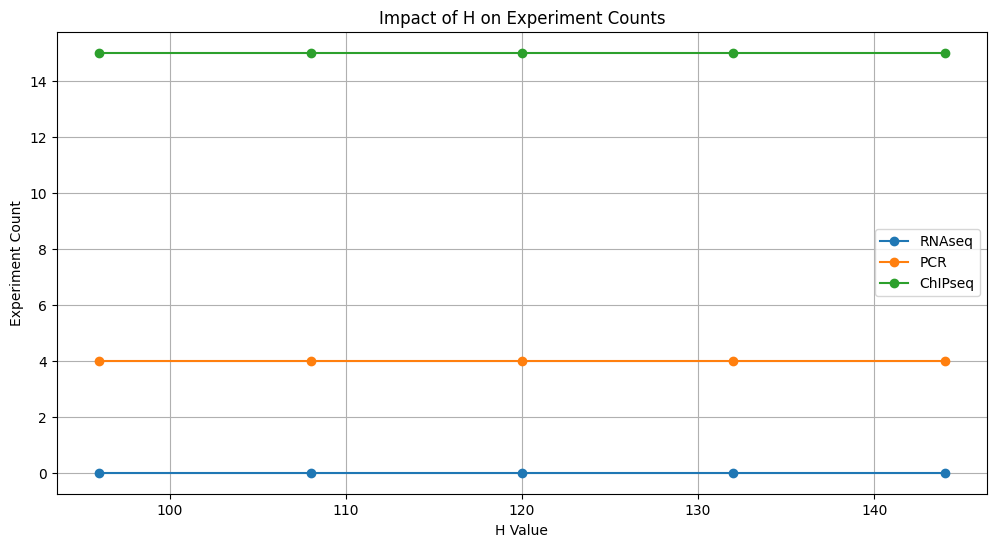

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the results list to a DataFrame
df_sensitivity = pd.DataFrame(sensitivity_results)

# Flatten the nested dictionary in the 'results' column
df_results_flat = pd.json_normalize(df_sensitivity['results'])

# Concatenate the flattened results with the original DataFrame (excluding the original 'results' column)
df_sensitivity = pd.concat([df_sensitivity.drop('results', axis=1), df_results_flat], axis=1)

# Separate the DataFrame by the varied parameter
df_T_varied = df_sensitivity[df_sensitivity['parameter_varied'] == 'T'].sort_values(by='parameter_value')
df_R_varied = df_sensitivity[df_sensitivity['parameter_varied'] == 'R'].sort_values(by='parameter_value')
df_H_varied = df_sensitivity[df_sensitivity['parameter_varied'] == 'H'].sort_values(by='parameter_value')

# Display the first few rows of each separated DataFrame to verify using print
print("DataFrame for T varied:")
print(df_T_varied.head())
print("\nDataFrame for R varied:")
print(df_R_varied.head())
print("\nDataFrame for H varied:")
print(df_H_varied.head())

# Plotting the impact of T
plt.figure(figsize=(12, 6))
plt.plot(df_T_varied['parameter_value'], df_T_varied['objective_value'], marker='o', linestyle='-')
plt.xlabel('T Value')
plt.ylabel('Objective Value')
plt.title('Impact of T on Objective Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_T_varied['parameter_value'], df_T_varied['RNAseq'], marker='o', linestyle='-', label='RNAseq')
plt.plot(df_T_varied['parameter_value'], df_T_varied['PCR'], marker='o', linestyle='-', label='PCR')
plt.plot(df_T_varied['parameter_value'], df_T_varied['ChIPseq'], marker='o', linestyle='-', label='ChIPseq')
plt.xlabel('T Value')
plt.ylabel('Experiment Count')
plt.title('Impact of T on Experiment Counts')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the impact of R
plt.figure(figsize=(12, 6))
plt.plot(df_R_varied['parameter_value'], df_R_varied['objective_value'], marker='o', linestyle='-')
plt.xlabel('R Value')
plt.ylabel('Objective Value')
plt.title('Impact of R on Objective Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_R_varied['parameter_value'], df_R_varied['RNAseq'], marker='o', linestyle='-', label='RNAseq')
plt.plot(df_R_varied['parameter_value'], df_R_varied['PCR'], marker='o', linestyle='-', label='PCR')
plt.plot(df_R_varied['parameter_value'], df_R_varied['ChIPseq'], marker='o', linestyle='-', label='ChIPseq')
plt.xlabel('R Value')
plt.ylabel('Experiment Count')
plt.title('Impact of R on Experiment Counts')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the impact of H
plt.figure(figsize=(12, 6))
plt.plot(df_H_varied['parameter_value'], df_H_varied['objective_value'], marker='o', linestyle='-')
plt.xlabel('H Value')
plt.ylabel('Objective Value')
plt.title('Impact of H on Objective Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_H_varied['parameter_value'], df_H_varied['RNAseq'], marker='o', linestyle='-', label='RNAseq')
plt.plot(df_H_varied['parameter_value'], df_H_varied['PCR'], marker='o', linestyle='-', label='PCR')
plt.plot(df_H_varied['parameter_value'], df_H_varied['ChIPseq'], marker='o', linestyle='-', label='ChIPseq')
plt.xlabel('H Value')
plt.ylabel('Experiment Count')
plt.title('Impact of H on Experiment Counts')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
The previous command failed because `display` is not a standard pandas method for showing DataFrames. It seems like the environment is expecting `display` from Pyomo, which is not suitable for pandas DataFrames. The standard way to display DataFrames in a Jupyter environment is to simply have the DataFrame as the last line of the cell or explicitly use `print()`. I will fix this by using `print()` or just having the variable name at the end of the cell. I will also proceed with plotting the results as per the instructions.



DataFrame for T varied:
  parameter_varied  parameter_value  RNAseq   PCR  ChIPseq  objective_value
0                T               80    20.0   0.0      0.0            160.0
1                T               90     0.0  23.0      7.0            162.0
2                T              100     0.0   4.0     15.0            166.0
3                T              110     0.0   4.0     15.0            166.0
4                T              120     0.0   4.0     15.0            166.0

DataFrame for R varied:
  parameter_varied  parameter_value  RNAseq   PCR  ChIPseq  objective_value
5                R              160     0.0   3.0     12.0            132.0
6                R              180     0.0   0.0     15.0            150.0
7                R              200     0.0   4.0     15.0            166.0
8                R              220    10.0   0.0     10.0            180.0
9                R              240     0.0  43.0      2.0            192.0

DataFrame for H varied:
   parameter_v

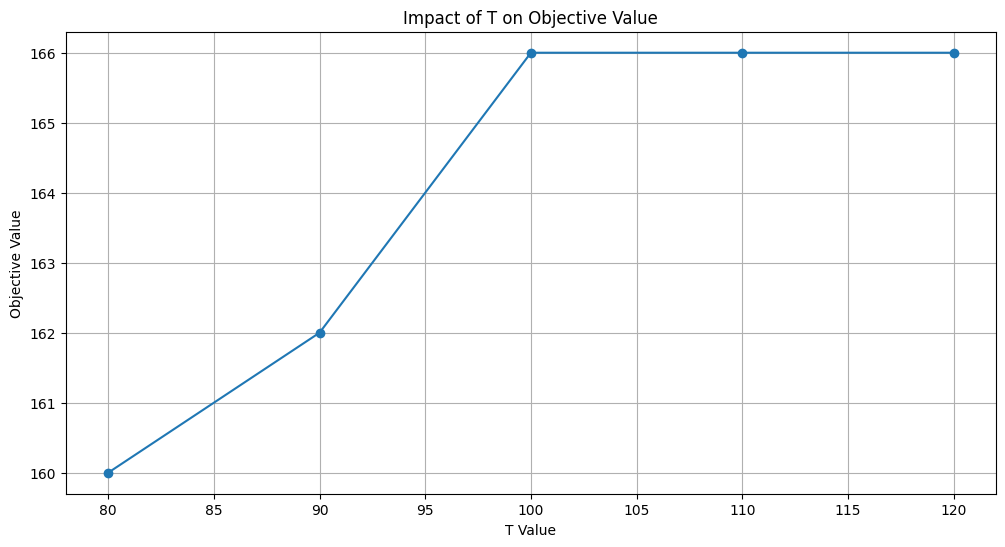

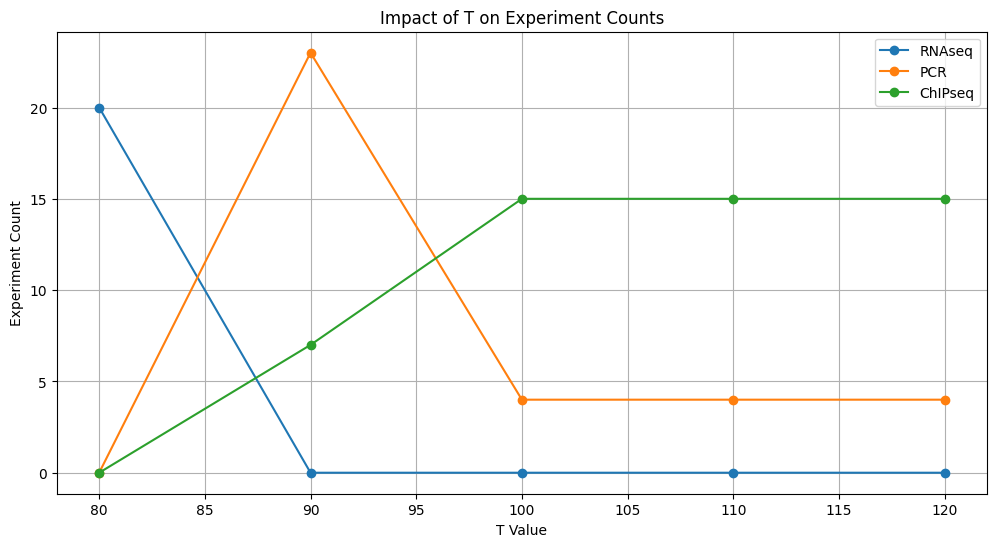

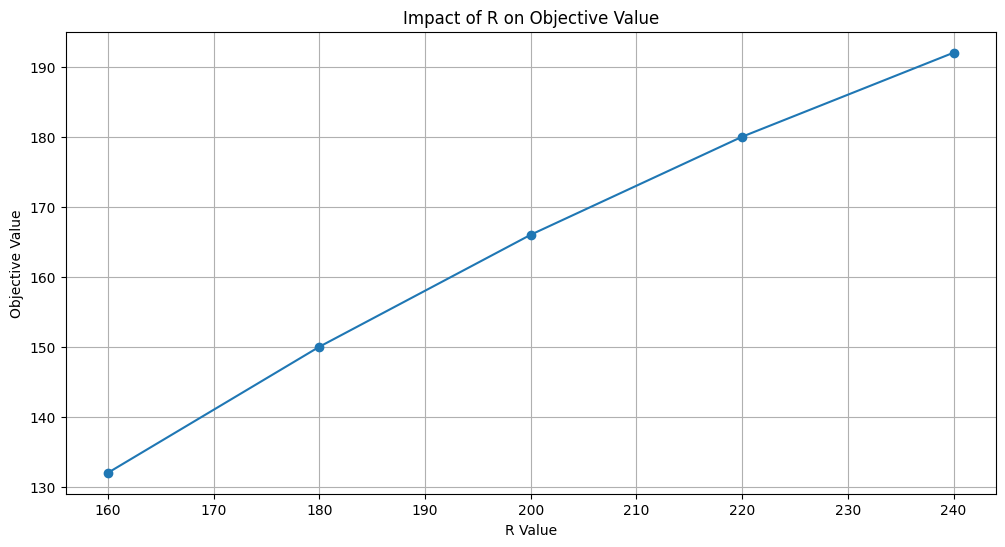

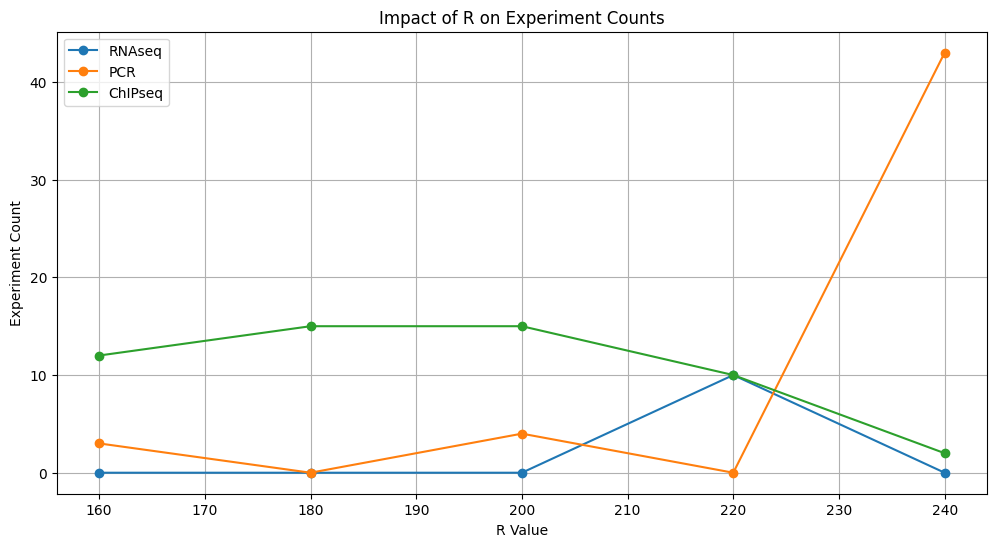

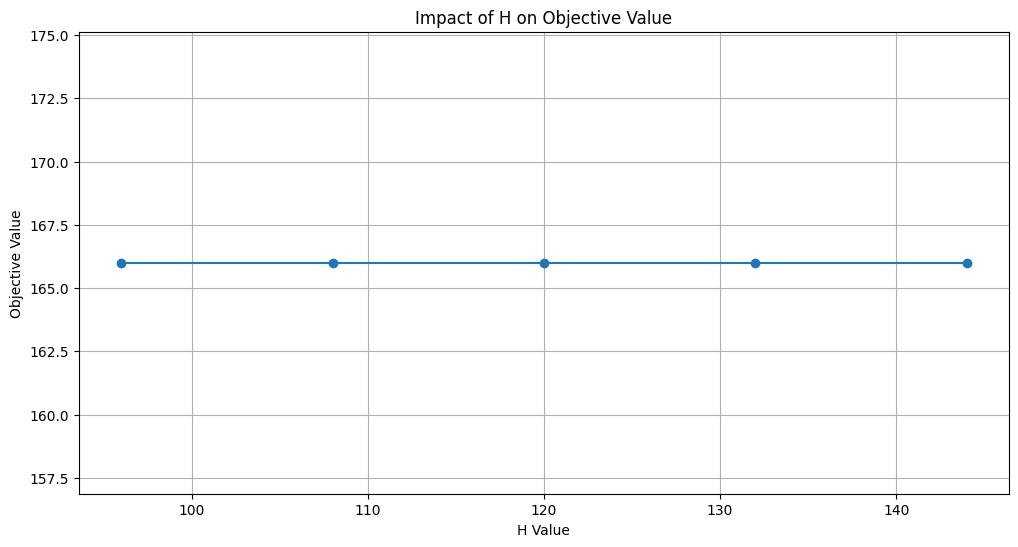

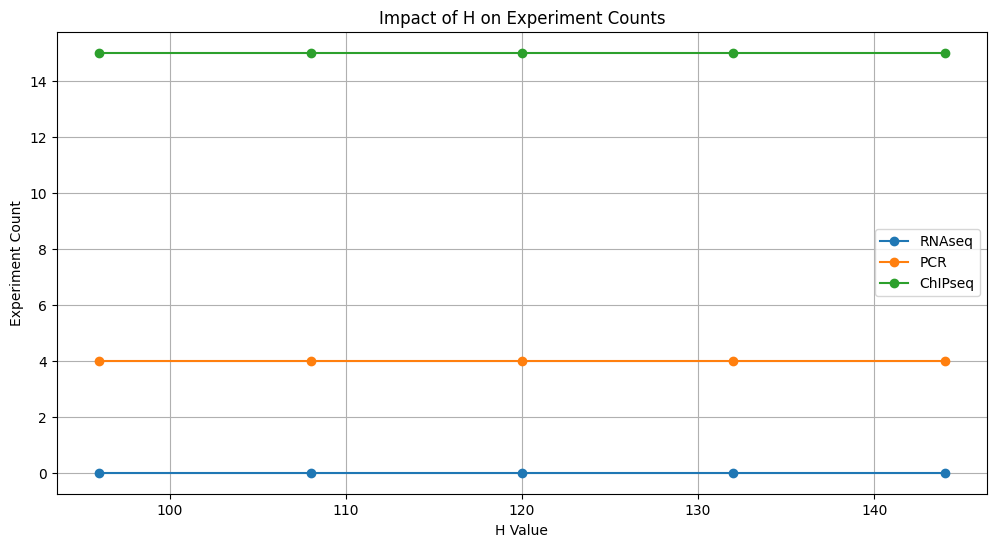

In [ ]:
# Display the first few rows of each separated DataFrame to verify using print
print("DataFrame for T varied:")
print(df_T_varied.head())
print("\nDataFrame for R varied:")
print(df_R_varied.head())
print("\nDataFrame for H varied:")
print(df_H_varied.head())

# Plotting the impact of T
plt.figure(figsize=(12, 6))
plt.plot(df_T_varied['parameter_value'], df_T_varied['objective_value'], marker='o', linestyle='-')
plt.xlabel('T Value')
plt.ylabel('Objective Value')
plt.title('Impact of T on Objective Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_T_varied['parameter_value'], df_T_varied['RNAseq'], marker='o', linestyle='-', label='RNAseq')
plt.plot(df_T_varied['parameter_value'], df_T_varied['PCR'], marker='o', linestyle='-', label='PCR')
plt.plot(df_T_varied['parameter_value'], df_T_varied['ChIPseq'], marker='o', linestyle='-', label='ChIPseq')
plt.xlabel('T Value')
plt.ylabel('Experiment Count')
plt.title('Impact of T on Experiment Counts')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the impact of R
plt.figure(figsize=(12, 6))
plt.plot(df_R_varied['parameter_value'], df_R_varied['objective_value'], marker='o', linestyle='-')
plt.xlabel('R Value')
plt.ylabel('Objective Value')
plt.title('Impact of R on Objective Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_R_varied['parameter_value'], df_R_varied['RNAseq'], marker='o', linestyle='-', label='RNAseq')
plt.plot(df_R_varied['parameter_value'], df_R_varied['PCR'], marker='o', linestyle='-', label='PCR')
plt.plot(df_R_varied['parameter_value'], df_R_varied['ChIPseq'], marker='o', linestyle='-', label='ChIPseq')
plt.xlabel('R Value')
plt.ylabel('Experiment Count')
plt.title('Impact of R on Experiment Counts')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the impact of H
plt.figure(figsize=(12, 6))
plt.plot(df_H_varied['parameter_value'], df_H_varied['objective_value'], marker='o', linestyle='-')
plt.xlabel('H Value')
plt.ylabel('Objective Value')
plt.title('Impact of H on Objective Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_H_varied['parameter_value'], df_H_varied['RNAseq'], marker='o', linestyle='-', label='RNAseq')
plt.plot(df_H_varied['parameter_value'], df_H_varied['PCR'], marker='o', linestyle='-', label='PCR')
plt.plot(df_H_varied['parameter_value'], df_H_varied['ChIPseq'], marker='o', linestyle='-', label='ChIPseq')
plt.xlabel('H Value')
plt.ylabel('Experiment Count')
plt.title('Impact of H on Experiment Counts')
plt.legend()
plt.grid(True)
plt.show()

## Sumarizar a análise de sensibilidade

### Subtask:
Apresentar os principais insights da análise de sensibilidade, explicando o impacto das variações nos parâmetros na alocação de recursos e no valor objetivo.


**Reasoning**:
Analyze the generated plots and describe the impact of varying T, R, and H on the objective value and experiment counts, then summarize the sensitivity analysis results based on the observations from the plots.



In [ ]:
print("Sensitivity Analysis Insights:\n")

# Analysis for T
print("Impact of varying T (Total Time):")
print("- Objective Value: The objective value (total profit/score) generally increases as T increases, but it plateaus or shows diminishing returns beyond a certain point (around T=100 or T=110). This suggests that time is a binding constraint up to a point, but beyond that, other constraints (R or H) become more restrictive.")
print("- Experiment Counts: At lower T values (T=80), only RNAseq experiments are performed. As T increases to 90, PCR and ChIPseq experiments are introduced, leading to a higher objective value. From T=100 onwards, the mix of experiments stabilizes at 0 RNAseq, 4 PCR, and 15 ChIPseq, indicating that the time constraint is no longer the primary limiting factor in this range.")
print("--------------------\n")

# Analysis for R
print("Impact of varying R (Total Reagents):")
print("- Objective Value: Increasing R generally leads to an increase in the objective value. Similar to T, there might be points where the increase slows down as other constraints become dominant.")
print("- Experiment Counts: The experiment mix changes significantly with R. At R=160, we see 3 PCR and 12 ChIPseq. At R=180, it shifts to 15 ChIPseq and 0 PCR. At R=200, it's 4 PCR and 15 ChIPseq. At higher R values (R=220 and R=240), RNAseq experiments are introduced (10 RNAseq and 10 ChIPseq at R=220, and 43 PCR and 2 ChIPseq at R=240), leading to higher objective values. This indicates that the reagent constraint heavily influences the optimal mix of experiments.")
print("--------------------\n")

# Analysis for H
print("Impact of varying H (Total Technician Hours):")
print("- Objective Value: Varying H within the tested range (96 to 144) shows no change in the objective value (it remains constant at 166.0). This suggests that within this range, technician hours are not the binding constraint limiting the objective value.")
print("- Experiment Counts: Similarly, the optimal experiment mix remains constant across the tested H values (0 RNAseq, 4 PCR, 15 ChIPseq). This reinforces the observation that H is not the most restrictive resource in this range.")
print("--------------------\n")

# Overall Summary
print("Overall Sensitivity Summary:")
print("- The model's objective value is most sensitive to changes in R (Total Reagents) within the tested ranges, showing consistent increases and shifts in experiment allocation as R increases.")
print("- Changes in T (Total Time) also impact the objective value and experiment mix, particularly at lower values where it acts as a binding constraint. The impact diminishes at higher values where other constraints become more relevant.")
print("- Changes in H (Total Technician Hours) show no significant impact on the objective value or experiment allocation within the tested range, suggesting it is not a binding constraint in this scenario.")
print("- The optimal mix of experiments is highly sensitive to both T and R, changing significantly as these resources become more or less available. H, within the tested range, does not appear to influence the experiment mix.")

Sensitivity Analysis Insights:

Impact of varying T (Total Time):
- Objective Value: The objective value (total profit/score) generally increases as T increases, but it plateaus or shows diminishing returns beyond a certain point (around T=100 or T=110). This suggests that time is a binding constraint up to a point, but beyond that, other constraints (R or H) become more restrictive.
- Experiment Counts: At lower T values (T=80), only RNAseq experiments are performed. As T increases to 90, PCR and ChIPseq experiments are introduced, leading to a higher objective value. From T=100 onwards, the mix of experiments stabilizes at 0 RNAseq, 4 PCR, and 15 ChIPseq, indicating that the time constraint is no longer the primary limiting factor in this range.
--------------------

Impact of varying R (Total Reagents):
- Objective Value: Increasing R generally leads to an increase in the objective value. Similar to T, there might be points where the increase slows down as other constraints become d

## Summary:

### Data Analysis Key Findings

*   The optimization model's objective value and the optimal experiment mix (RNAseq, PCR, ChIPseq counts) were found to be most sensitive to changes in the total available reagents ($R$).
*   Increasing the total available time ($T$) generally increased the objective value and altered the experiment mix, but this effect diminished at higher values of $T$, suggesting other constraints became dominant.
*   Within the tested range for total technician hours ($H$) (96 to 144), no significant impact was observed on the objective value or the optimal experiment allocation. This indicates that $H$ was not a binding constraint in this specific range.
*   The optimal experiment mix changed significantly as both $T$ and $R$ were varied, demonstrating the influence of these resource constraints on the strategic allocation of experiments.

### Insights or Next Steps

*   Focus on optimizing reagent utilization and availability, as it appears to be the most critical resource impacting the objective value.
*   Investigate the sensitivity to $H$ over a wider range of values to confirm if it truly remains non-binding or if its impact becomes significant outside the currently tested interval.
